## Import libraries

In [2]:
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import awkward as ak
import dask
from hist.dask import Hist
from coffea.nanoevents import NanoEventsFactory, PHYSLITESchema, BaseSchema
from coffea.analysis_tools import PackedSelection
import mplhep
import uproot
import coffea.nanoevents
import math

PHYSLITESchema.warn_missing_crossrefs = False


$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
$\psi\rightarrow e^{i\alpha(x)}\psi$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu D_\mu-m)\psi$$
$D_\mu=\partial_\mu+ieA_\mu(x)$

<font color='red'>$V(\phi)$</font>
$V(\phi)$
$$V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4$$
$\phi\rightarrow-\phi$

### Gauge symmetry

1. What is symmetry?

   Lagrangian is invariant under a certain transformation. Specifically, for the gauge symmetry, Lagrangian should invariant under gauge transformation.
2. What does Lagrangian for the spinor field look like?
   $$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
3. What is gauge transformation?
   There're two types of gauge transformation:
   - Global gauge transformation $\psi\rightarrow e^{i\alpha}\psi$ 
   - Local gauge transformation $\psi\rightarrow e^{i\alpha(x)}\psi$

    Specifically, global gauge transformation means that we change the phase by the same amount *everywhere* in spacetime where as in local gauge transformation the phase change is dependent on spacetime. $\mathcal{L}$ is naturally invariant under the global transformation since $\mathcal{L}\rightarrow(e^{-i\alpha}\bar{\psi})(i\gamma^\mu\partial_\mu-m)(e^{i\alpha}\psi)$. However, $\mathcal{L}$ is not necessarily invariant under the local transformation.
4. How to make

### Spontaneous Symmetry Breaking

$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$
$$V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4$$


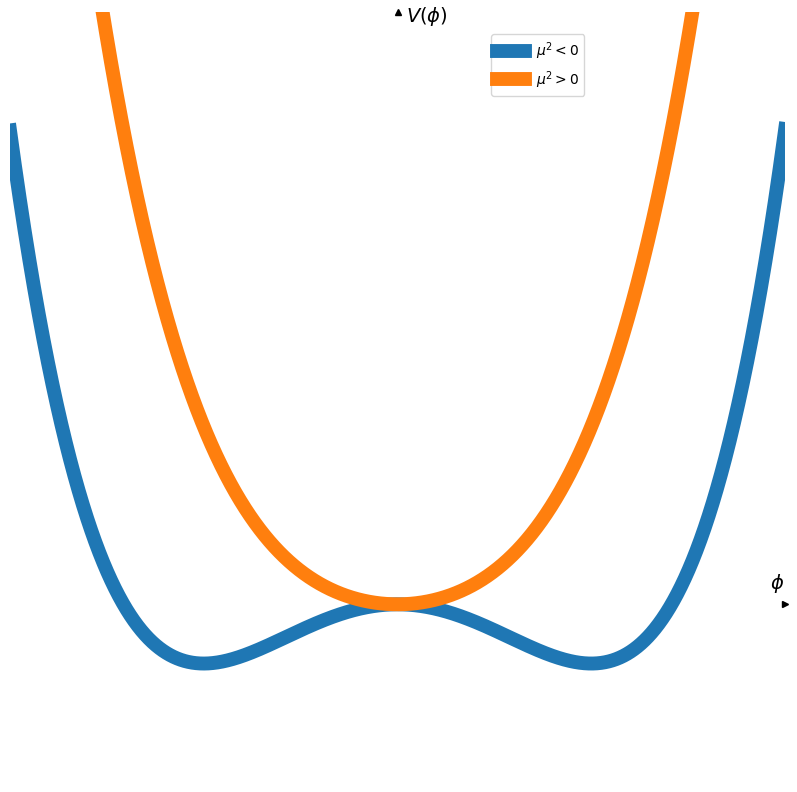

In [14]:
x = np.arange(-3, 3, .001)
mu2 = 4
lamda=24
vev = 6*mu2/lamda
V_min = -3*mu2**2/2/lamda
y_pos = mu2/2 * x**2 + lamda/math.factorial(4) * x**4
y_neg = -mu2/2 * x**2 + lamda/math.factorial(4) * x**4
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y_neg, label=r'$\mu^2<0$', linewidth=10)
ax.plot(x, y_pos, label=r'$\mu^2>0$', linewidth=10)
#ax.scatter([np.sqrt(vev),-np.sqrt(vev)], [V_min,V_min], marker='o', s=500, color='red')
ax.set_ylim(-3,10)
ax.set_xlim(-2, 2)

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', linewidth=10, transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(r'$\phi$', size=14, labelpad=-24, x=.99)
ax.set_ylabel(r'$V(\phi)$', size=14, labelpad=-21, y=.98, rotation=0)

# Get rid of ticks
ax.set_yticks([])
ax.set_xticks([])

ax.legend(bbox_to_anchor=(.75, .98))
#plt.savefig('../slides_plots/SSB_real_scalar_field.jpg')

plt.show()

## References